# Helper functions

In [1]:
import numpy.random as nr
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm


def linear(x):
    return x

def quadratic(x):
    return (x-0.5)**2

def cubic(x):
    return (x-0.5)**3

def sin_half(x):
    return np.sin(2*np.pi*x/0.5)

def sin_eighth(x):
    return np.sin(2*np.pi*x/0.125)

def x_to_025(x):
    return x**0.25

def circle(x):
    rand = nr.uniform(0,1,1)
    if rand > 0.5:
        sign = 1.
    else:
        sign = -1.
    return sign * np.sqrt(1 - 4 * (x-0.5)**2)

def step(x):
    if x > 0.5:
        return 1.
    else:
        return 0.
    
    
def add_gaussian_noise(x,sigma_squared):
    if sigma_squared < 0.000001:
        return [x]
    else:
        return x + nr.normal(0,np.sqrt(sigma_squared),1)



def apply_functions_to_array(array, functions, sigma_squared):
    #functions = [tranformation, add_gaussian_noise]
    y = []
    for x in array:
        y.append(functions[1](functions[0](x),sigma_squared)[0])
    return y    
    

# Create synthetic data
def calculate_xy(n,alpha,sigma_squared,transformation, dependent):
    
    x_rare = list(nr.uniform(0,1,int(n*alpha)))
    if dependent == True:
        y_rare = apply_functions_to_array(x_rare,[transformation, add_gaussian_noise], sigma_squared)
    if dependent == False:
        y_rare = apply_functions_to_array(nr.uniform(0,1,int(n*alpha)),[transformation, add_gaussian_noise], sigma_squared)
        
    x_dominant = list(nr.uniform(1.,1.1,int(n - n*alpha)))
    y_dominant = apply_functions_to_array(nr.uniform(0.,1.,int(n - n*alpha)),[transformation, add_gaussian_noise], sigma_squared)
    
    return (x_rare + x_dominant, y_rare + y_dominant)


# Functions for calculating different correlation measures

In [3]:
import HC_estimator as hce
from minepy import MINE
from ace import ace
from scipy import stats
from scipy.spatial.distance import pdist, squareform
import numpy as np

#Use code from https://github.com/wgao9/hypercontractivity
def calc_hc(x,y):
    return hce.HC(np.array(x),np.array(y),0.53)

def calc_mic(x,y):
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x,y)
    return mine.mic()

def calc_mcor(x,y):
    ace_solver = ace.ACESolver()
    ace_solver.specify_data_set([x], y)
    ace_solver.solve()
    (MC, Pval) = stats.pearsonr( ace_solver.x_transforms[0], ace_solver.y_transform )
    return MC

def calc_cor(x,y):
    return stats.pearsonr(x, y)[0]

# Taken from https://gist.github.com/satra/aa3d19a12b74e9ab7941
def calc_dcor(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor


# Synthetic data

A Jupyter Widget

* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  9.86898E-01
* Starting outer iteration 001. Current err =  9.72036E-01
  Starting inner iteration 000. Current err =  9.72036E-01
  Starting inner iteration 001. Current err =  8.95486E-01
  Starting inner iteration 002. Current err =  8.95486E-01
* Starting outer iteration 002. Current err =  8.66695E-01
  Starting inner iteration 000. Current err =  8.66695E-01
  Starting inner iteration 001. Current err =  8.32429E-01
* Starting outer iteration 003. Current err =  8.27339E-01
  Starting inner iteration 000. Current err =  8.27339E-01
  Starting inner iteration 001. Current err =  8.13277E-01
* Starting outer iteration 004. Current err =  8.18445E-01
  Starting inner iteration 000. Current err =  8.18445E-01
  Starting inner iteration 001. Current err =  8.10332E-01
  Starting inner iteration 002. Current err =  8.10332E-

* Starting outer iteration 003. Current err =  9.27804E-01
  Starting inner iteration 000. Current err =  9.27804E-01
  Starting inner iteration 001. Current err =  9.18490E-01
* Starting outer iteration 004. Current err =  9.08466E-01
  Starting inner iteration 000. Current err =  9.08466E-01
  Starting inner iteration 001. Current err =  9.03074E-01
* Starting outer iteration 005. Current err =  8.93837E-01
  Starting inner iteration 000. Current err =  8.93837E-01
  Starting inner iteration 001. Current err =  8.84620E-01
* Starting outer iteration 006. Current err =  8.79170E-01
  Starting inner iteration 000. Current err =  8.79170E-01
* Starting outer iteration 000. Current err =  1.00000E+00
  Starting inner iteration 000. Current err =  1.00000E+00
  Starting inner iteration 001. Current err =  9.02104E-01
* Starting outer iteration 001. Current err =  8.59953E-01
  Starting inner iteration 000. Current err =  8.59953E-01
  Starting inner iteration 001. Current err =  8.41887E-

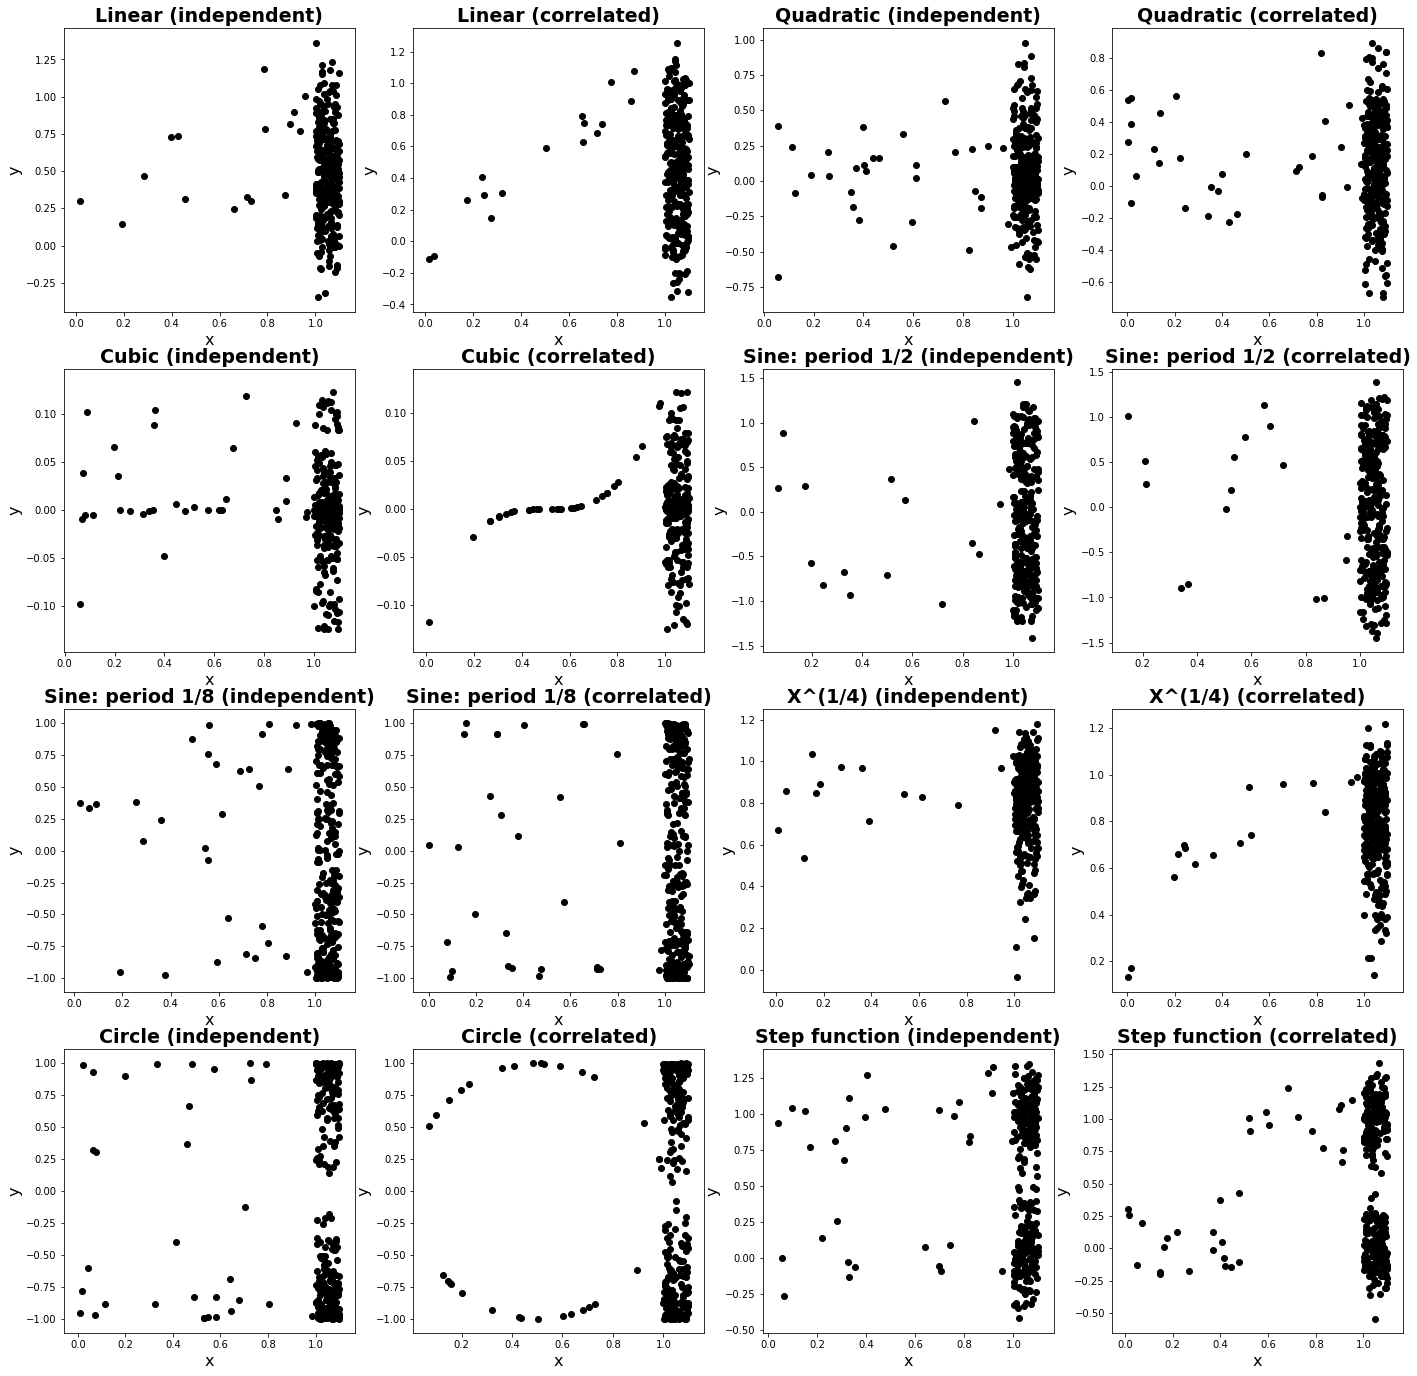

[[ 0.05 -0.    0.13  0.1   0.33  0.44  0.21  0.2   0.16  0.17]
 [-0.05  0.03  0.08  0.06  0.3   0.17  0.2   0.16  0.1   0.17]
 [ 0.05 -0.1   0.14  0.11  0.31  0.18  0.27  0.17  0.39  0.13]
 [-0.07  0.01  0.1   0.09  0.35  0.36  0.18  0.22  0.17  0.1 ]
 [ 0.01 -0.06  0.05  0.11  0.25  0.38  0.18  0.21  0.12  0.22]
 [ 0.18 -0.    0.18  0.08  0.3   0.36  0.19  0.18  0.71  0.09]
 [-0.    0.03  0.06  0.05  0.36  0.19  0.21  0.17  0.08  0.06]
 [ 0.12 -0.01  0.15  0.06  0.31  0.23  0.21  0.2   0.14  0.08]]


In [4]:
   
n = 320

alphas = [0.05,0.1,0.1,0.05,0.1,0.05,0.1,0.1]
functions = [linear, quadratic, cubic, sin_half, sin_eighth, x_to_025,circle,step]
correlation_functions = [calc_cor,calc_dcor, calc_mcor,calc_mic, calc_hc]
sigma_squareds = [0.03,0.1,0.0,0.03,0.0,0.01,0.,0.03]
titles= ['Linear','Quadratic','Cubic','Sine: period 1/2','Sine: period 1/8','X^(1/4)','Circle','Step function']
correlations = np.zeros((8,10))

fig, axs = plt.subplots(4, 4)
fig.set_size_inches(24, 24)

counter = 0
for row in tqdm(range(4)):
    for col in range(4):
        if (counter % 2) == 0:
            dependent = False
            title_part_two = ' (independent)'
        else:
            dependent = True
            title_part_two = ' (correlated)'
        x,y = calculate_xy(n,alphas[counter//2],sigma_squareds[counter//2], functions[counter//2], dependent=dependent)
        axs[row,col].scatter(x,y,color='black')
        axs[row,col].set_title(titles[counter//2] + title_part_two,fontsize=19,fontweight="bold")
        
        for i,correlation_function in enumerate(correlation_functions):
            if dependent == False:
                correlations[counter//2][1+2*i] = np.round(correlation_function(x,y),decimals=2)
            else:
                correlations[counter//2][0+2*i] = np.round(correlation_function(x,y),decimals=2)
        counter += 1
        
for ax in axs.flat:
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)

#plt.savefig('correlations.png', dpi=150)
#mnp.savetxt("table_corr.csv", correlations, delimiter=' & ', fmt='%2.2f', newline=' \\\\\n')
plt.show()
print(correlations)

# Functions for performing power tests

In [5]:
# perform a power test
def calculate_power(number_tests,number_samples,alpha,sigma_squared, transformation, correlation_function):
    dependent_coefficient = np.zeros(number_tests)
    independent_coefficient = np.zeros(number_tests)
    
    for i in tqdm(range(number_tests)):
        #For dependent samples
        x,y = calculate_xy(number_samples, alpha, sigma_squared, transformation, True)
        dependent_coefficient[i] =  correlation_function(x,y)
        # for independent samples
        x,y = calculate_xy(number_samples, alpha, sigma_squared, transformation, False)
        independent_coefficient[i] =  correlation_function(x,y)
    #find top 5% value of independent samples
    top_5_percent_value = np.sort(independent_coefficient)[np.int(np.floor(0.95 * number_tests))-1]
    #find how many values of dependent samples are bigger than this
    number_dependent_greater = len(np.nonzero(dependent_coefficient > top_5_percent_value)[0])
    return number_dependent_greater / number_tests

# perform power tests for different correlation measures as a function of noise
def powers_linear():
    sigma_squareds = [0., 0.01, 0.03, 0.1, 0.3, 1., 3.]
    correlation_functions = [calc_hc]
    powers = np.zeros((len(correlation_functions),len(sigma_squareds)))

    f = open("new_powers_1.txt","a")
    f.write('\n sigma squared '+str(sigma_squareds) + '\n')
    f.flush()

    for i,function in enumerate(correlation_functions):
        f.write('\n'+str(function))
        for j,sigma_squared in enumerate(sigma_squareds):
            power = calculate_power(500,320,0.05,sigma_squared,linear, function)
            powers[i][j] = power
            f.write(str(power)+' ')
            f.flush()
    f.close()
    np.save('powers', powers)


In [ ]:
# Calculate powers for linear function, will take a day as HC and MIC are very slow
powers_linear()

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

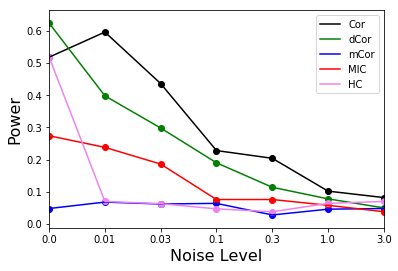

In [6]:
def plot_powers(powers):
    #powers_loaded = np.load('powers.npy')
    alphas = [0., 0.01, 0.03, 0.1, 0.3, 1., 3.]
    correlation_function_names = ['Cor','dCor','mCor','MIC','HC']
    colors = ['black','green','blue','red','violet']
    a = np.arange(7)
    fig = plt.figure()
    ax1  = fig.add_subplot(111)
    for i in range(5):
        ax1.plot(a,powers[i],label = correlation_function_names[i],color=colors[i])
        ax1.scatter(a,powers[i],color=colors[i])
    ax1.xaxis.set_ticks(a) #set the ticks to be a
    ax1.xaxis.set_ticklabels(alphas)
    plt.xlabel('Noise Level', fontsize=16)
    plt.ylabel('Power',fontsize=16)
    plt.legend()
    plt.xlim((0,6.))
    plt.plot()
    plt.savefig('power_noise.png',dpi=150)
    plt.show()

alphas = [0., 0.01, 0.03, 0.1, 0.3, 1., 3.]
# powers computed
powers = np.array([[0.518, 0.596, 0.436, 0.228, 0.204, 0.102, 0.082],
                [0.624, 0.398, 0.298, 0.19, 0.114, 0.078, 0.05],
                [0.048, 0.068, 0.062, 0.064, 0.028, 0.046, 0.048],
                [0.274, 0.238, 0.186, 0.076, 0.076, 0.058, 0.038],
                [0.51,0.058,0.054,0.05,0.04,0.064,0.074]])

# re-ran calculation of powers for hypercontractivity and averaged over two runs 
second_try_hc = np.array([0.528 ,0.082 ,0.072 ,0.044, 0.036, 0.064, 0.066])

powers[4] += second_try_hc
powers[4] /= 2
plot_powers(powers)

# WHO data

In [ ]:
import pandas as pd
nr.seed(2)

def generate_pair_indicators():
    while True: 
        index_1, index_2 = nr.randint(2,358), nr.randint(2,358)
        indicators = {}
        indicators['names'] = [df.columns[index_1],df.columns[index_2]]
        stacked_data = np.stack((np.array(df.iloc[:,index_1]),np.array(df.iloc[:,index_2])),axis=1)
        indicators['data'] = stacked_data[~np.isnan(stacked_data).any(axis=1)]
        if len(indicators['data']) != 0:
            return indicators

def calculate_pairs(n):
    names_pairs = []
    #first value is hypercontractivity, second value is MIC
    correlations_pairs = np.zeros((n,2))
    for i in tqdm(range(n)):
        indicators_dict = generate_pair_indicators()
        names_pairs.append(indicators_dict['names'])
        x = np.ndarray.flatten(indicators_dict['data'][:,0])
        y = np.ndarray.flatten(indicators_dict['data'][:,1])
        correlations_pairs[i,0] = calc_hc(x,y)
        correlations_pairs[i,1] = calc_mic(x,y)
    return {'names_pairs': names_pairs, 'correlations_pairs':correlations_pairs}


df = pd.read_csv('WHO.csv')
n = 500
data = calculate_pairs(n)
x,y = np.ndarray.flatten(data['correlations_pairs'][:,0]), np.ndarray.flatten(data['correlations_pairs'][:,1])


A Jupyter Widget

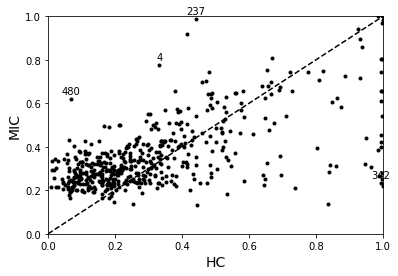

In [34]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='black',marker='.')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

for i in [480,4,237,342]:
    ax.annotate(str(i), (x[i], y[i]), textcoords="offset points",xytext=(0,5),ha='center')

plt.xlabel('HC',fontsize=14)
plt.ylabel('MIC',fontsize=14)
plt.plot([0,1.],[0,1],'--',color='black')
plt.show()

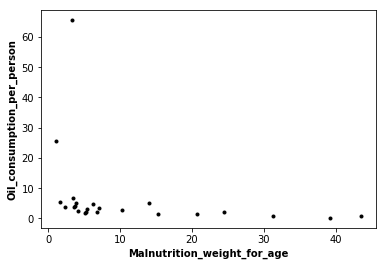

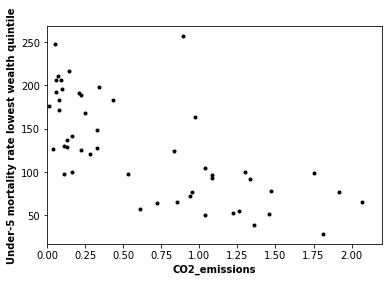

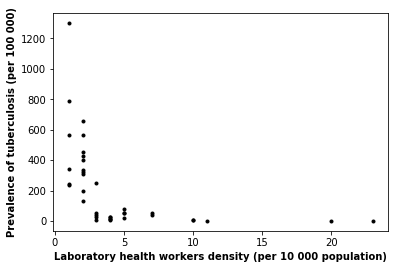

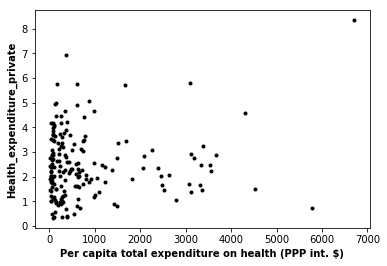

In [81]:
def plot_x_y_from_pair(data,number):
    indicator_1, indicator_2 = data['names_pairs'][number][0],data['names_pairs'][number][1]
    stacked_data = np.array(df[[indicator_1,indicator_2]])
    filtered_data = stacked_data[~np.isnan(stacked_data).any(axis=1)]
    x,y = np.ndarray.flatten(filtered_data[:,0]),np.ndarray.flatten(filtered_data[:,1])
    plt.scatter(x,y,color='black',marker='.')
    plt.xlabel(indicator_1,fontweight='bold')
    plt.ylabel(indicator_2,fontweight='bold')
    
    if number ==4:
        plt.ylabel('Under-5 mortality rate lowest wealth quintile')
        plt.xlim((0,2.2))
    if number ==237:
        plt.ylabel('Prevalence of tuberculosis (per 100 000)')
        #plt.xlim((0,2.2))
    plt.savefig('pair_'+str(number),dpi=70)
    plt.show()
plot_x_y_from_pair(data,480)
plot_x_y_from_pair(data,4)
plot_x_y_from_pair(data,237)
plot_x_y_from_pair(data,342)